## Overview
I quickly went through and did some basic cleaning. I checked correlations using a heatmap and got a better look at the correlated features with a pairplot. I ran a basic oridinary least squares regression for a baseline model and was able to account for approx. 27% of the variance. All of which is statistically significant expect chlorides. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [3]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
columns = {}
# I dont like spaces in my column names so I replaced them with underscores
for column in df.columns:
    columns[column] = column.replace(" ", "_")
df.rename(columns=columns, inplace=True)

In [5]:
results = {}
for column in df.columns:
    # Cycles through each column to check value counts easier. I use this for almost every dataset I work with. 
    results[column] = df[column].value_counts()
results

{'type': white    4898
 red      1599
 Name: type, dtype: int64,
 'fixed_acidity': 6.80     354
 6.60     326
 6.40     305
 7.00     282
 6.90     279
         ... 
 14.30      1
 15.90      1
 13.80      1
 14.20      1
 6.45       1
 Name: fixed_acidity, Length: 106, dtype: int64,
 'volatile_acidity': 0.280    286
 0.240    265
 0.260    255
 0.250    238
 0.220    235
         ... 
 0.805      1
 1.130      1
 1.185      1
 0.565      1
 0.865      1
 Name: volatile_acidity, Length: 187, dtype: int64,
 'citric_acid': 0.30    337
 0.28    301
 0.32    289
 0.49    283
 0.26    257
        ... 
 1.66      1
 0.75      1
 0.86      1
 0.99      1
 1.23      1
 Name: citric_acid, Length: 89, dtype: int64,
 'residual_sugar': 2.00     235
 1.80     228
 1.60     223
 1.40     219
 1.20     195
         ... 
 14.15      1
 14.05      1
 3.15       1
 8.95       1
 20.30      1
 Name: residual_sugar, Length: 316, dtype: int64,
 'chlorides': 0.044    206
 0.036    200
 0.042    187
 0.046  

In [7]:
df.info()
# checked for NA values and found very few.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
# Replaced red and white with binary reps in order to add it to my data.
df.replace(['red', 'white'], [0,1], inplace=True)
nonas = df.dropna()
# Decided to drop all NA values becuase there was so few and they are spread out
whites = nonas[nonas['type'] == 1].drop('type', axis=1)
reds = nonas[nonas['type'] == 0].drop('type', axis=1)


In [ ]:
# Decided to drop all NA values becuase there was so few and they are spread out
corr = nonas.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Created a heatmap using Seaborn to get an overview of correlations that looks pretty

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");


In [ ]:
correl = ["alcohol", "citric_acid", "chlorides", "volatile_acidity", "density", 'quality']
df_correl = nonas[correl]
# Used seaborns pairplot to quickly generate distributions and scatterplots. 
sns.pairplot(df_correl);

In [ ]:
def create_basic_formula(target : str, features : list):
    """
    Takes in a target and list of features to create a ordinary least squares formula using only addition
    """
    formula = target + ' ~ '
    for feature in features:
        add = feature + ' + '
        formula += add
    return formula[:-3]
    

In [ ]:
formula = create_basic_formula('quality', ["alcohol", "citric_acid", "chlorides", "volatile_acidity", "density"])
formula

In [ ]:
results = sm.ols(formula=formula, data=nonas).fit()
results.summary()

In [11]:
calculate_bartlett_sphericity(nonas), calculate_bartlett_sphericity(whites), calculate_bartlett_sphericity(reds)

((51977.13078157587, 0.0), (26323.49283722722, 0.0), (8710.843336783457, 0.0))

In [28]:
for df in [nonas, whites, reds]:
        print(calculate_kmo(df)[0], '\n', df.columns.to_list(), calculate_kmo(df)[1])

[0.66348411 0.34217402 0.77982253 0.6833958  0.31047142 0.85829767
 0.73608883 0.72916801 0.34297212 0.25952442 0.73532552 0.32234925
 0.76021977] 
 ['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 0.502024203529345
[0.17170795 0.30349284 0.71973928 0.33082964 0.69826304 0.59230425
 0.71636172 0.41809538 0.16110919 0.18990695 0.40727994 0.77417705] 
 ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 0.39734500097344955
[0.45463739 0.58360821 0.70841761 0.2098354  0.47464602 0.48568911
 0.46861342 0.37725173 0.44954036 0.55193852 0.31796176 0.76311079] 
 ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alc

In [43]:
dropNonas = ['fixed_acidity', 'residual_sugar', 'density', 'pH', 'alcohol']
dropWhites = ['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'density', 'pH', 'sulphates', 'alcohol']
dropReds = ['residual_sugar', 'density', 'alcohol', 'chlorides', 'total_sulfur_dioxide']
prepNonas = nonas.drop(dropNonas, axis=1)
prepWhites = whites.drop(dropWhites, axis=1)
prepReds = reds.drop(dropReds, axis=1)

for df in [prepNonas, prepWhites, prepReds]:
    print(calculate_bartlett_sphericity(df), calculate_kmo(df),'\n', df.columns.to_list()) 

(19687.18088784252, 0.0) (array([0.68922641, 0.71448025, 0.58480753, 0.81552964, 0.67540084,
       0.63260458, 0.72563929, 0.51800978]), 0.6839383168443038) 
 ['type', 'volatile_acidity', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'quality']
(3064.3051514755175, 0.0) (array([0.70927872, 0.64974127, 0.49642456, 0.51203477, 0.44260189]), 0.5161237522105457) 
 ['citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'quality']
(3202.135041597149, 0.0) (array([0.65412007, 0.64110838, 0.69845648, 0.53844032, 0.75023635,
       0.80682728, 0.66066734]), 0.6896276812580536) 
 ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_sulfur_dioxide', 'pH', 'sulphates', 'quality']


In [44]:
fa = FactorAnalyzer()
fa.fit(prepNonas)
ev, v = fa.get_eigenvalues()
ev

array([3.23662636, 1.26297941, 1.19129883, 0.84023154, 0.54928707,
       0.45233242, 0.32225857, 0.14498579])

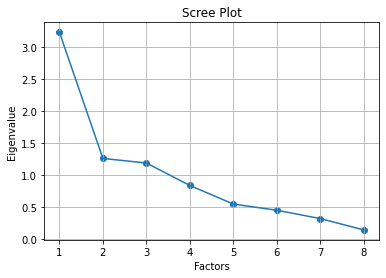

(array([1.88105026, 1.4030409 , 1.13492298]), array([0.23513128, 0.17538011, 0.14186537]), array([0.23513128, 0.4105114 , 0.55237677]))


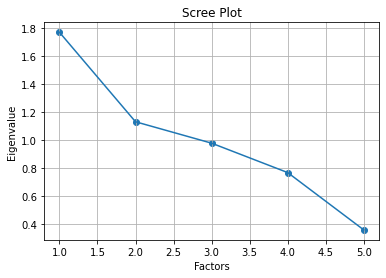

(array([1.21359804, 0.65459999, 0.29118222]), array([0.24271961, 0.13092   , 0.05823644]), array([0.24271961, 0.37363961, 0.43187605]))


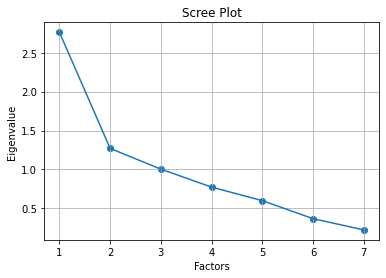

(array([1.68600312, 1.3034525 , 0.9996515 ]), array([0.24085759, 0.1862075 , 0.14280736]), array([0.24085759, 0.42706509, 0.56987244]))


In [53]:
for df in [prepNonas, prepWhites, prepReds]:
    fa = FactorAnalyzer(n_factors=3, rotation='varimax')
    fa.fit(df)
    ev, v = fa.get_eigenvalues()
    plt.scatter(range(1,df.shape[1]+1),ev)
    plt.plot(range(1,df.shape[1]+1),ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()
    plt.show()
    print(fa.get_factor_variance())

In [ ]:
fa = FactorAnalyzer()